In [4]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

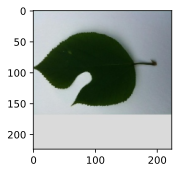

In [5]:
d2l.set_figsize()
img = d2l.Image.open('../data/classify_leaves/images/23.jpg')
d2l.plt.imshow(img);

In [6]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

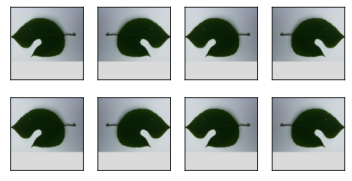

In [7]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

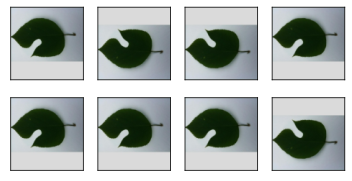

In [8]:
apply(img, torchvision.transforms.RandomVerticalFlip())

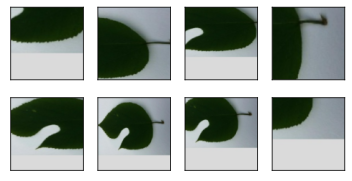

In [9]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

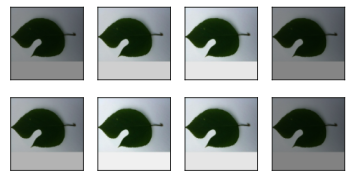

In [10]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0, saturation=0, hue=0))

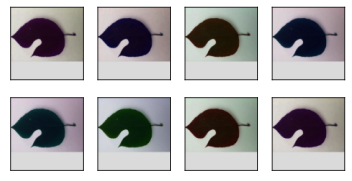

In [11]:
apply(img, torchvision.transforms.ColorJitter(
    brightness=0, contrast=0, saturation=0, hue=0.5))

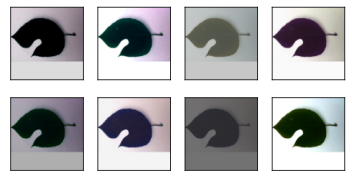

In [12]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
apply(img, color_aug)

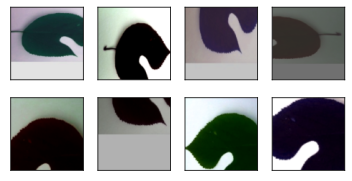

In [13]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])
apply(img, augs)

Files already downloaded and verified


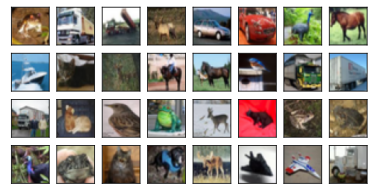

In [14]:
all_images = torchvision.datasets.CIFAR10(train=True, root="../data",download=True)
test_set = torchvision.datasets.CIFAR10(root="../data", train=False, download=True)
d2l.show_images([test_set[i][0] for i in range(32)], 4, 8, scale=0.8);

In [ ]:
test_set = torchvision.datasets.CIFAR10(root="../data", train=False, download=True)

In [15]:
print(all_images)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data
    Split: Train


In [20]:
print(all_images.classes)  #根据分的文件夹的名字来确定的类别
print(all_images.class_to_idx) #按顺序为这些类别定义索引为0,1...
print(all_images[0]) #返回从所有文件夹中得到的图片的路径以及其类别

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
(<PIL.Image.Image image mode=RGB size=32x32 at 0x1256661D250>, 6)
